# Implementation for Bankruptcy Data Science Challenge

In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.model_selection import train_test_split 
import sklearn
from random import shuffle

import xgboost
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
import missingno as msno


# Loading the data

In [2]:
df = pd.read_excel('Bankruptcy dataset.xlsx')
df.head(100)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankruptcy?
0,0.009746,0.59288,0.006111,1.01260,-2157.3000,-0.020388,0.011053,0.686680,1.57430,0.407120,...,0.314050,0.023939,0.70510,0.190040,9.8813,5.4101,112.370,3.24820,3.0917,0
1,0.084104,0.47244,0.275890,1.64280,-3.9840,0.339550,0.084104,1.116700,3.21940,0.527560,...,0.029764,0.159420,0.97394,0.053003,10.6140,8.9620,48.661,7.50080,10.9160,0
2,-0.221670,0.86884,0.125460,1.48690,-2.8629,-0.256780,-0.202700,0.048645,0.87939,0.042265,...,-0.137150,-5.244800,1.13710,14.461000,10.1470,6.0056,76.780,4.75380,1.9856,0
3,0.011514,0.80752,-0.011056,0.98631,-251.7900,0.029182,0.014275,0.234480,1.03500,0.189350,...,0.033838,0.060808,0.96616,0.000000,1.5238,2.8550,373.180,0.97809,3.8805,0
4,0.245470,0.51585,0.244940,1.52010,5.2834,0.342680,0.293350,0.789690,1.13510,0.407360,...,0.119020,0.602580,0.88098,0.110190,13.0540,5.3119,65.837,5.54400,9.1907,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.489630,0.88447,-0.039895,0.92472,-79.1430,0.000000,-0.489630,0.130620,2.11530,0.115530,...,-0.192580,-4.238100,1.23150,2.791000,NaN,NaN,91.449,3.99130,4.1481,0
96,0.024406,0.67834,0.014262,1.02860,-19.1890,0.000000,0.029385,0.474180,2.26790,0.321660,...,-0.041003,0.075875,0.98802,0.428870,19.4650,6.2855,80.339,4.54320,4.6609,0
97,0.321240,0.24355,0.266960,2.25570,-10.0010,0.000000,0.397510,3.105900,1.35680,0.756450,...,0.324910,0.424670,0.67498,0.025341,11.3450,7.2292,57.191,6.38210,2.6069,0
98,-0.115880,0.44584,-0.087628,0.77779,-39.7480,0.000000,-0.115880,1.242900,1.79350,0.554160,...,-0.044591,-0.209110,1.06410,0.092911,17.2300,15.8760,80.256,4.54790,2.5870,0


Total number of rows 12034 and columns are 14.

### Creating Target labels based on matched and feature transaction ids

In [3]:
df['bankruptcy?'].value_counts()

0    30985
1     1568
Name: bankruptcy?, dtype: int64

The dataset is highly skewed/imbalanced, only 857 correct matches are present.

# EDA-  Data visualization

In [4]:
df.shape

(32553, 65)

In [5]:
df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'bankruptcy?'],
      dtype='object')

In [6]:
df.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,bankruptcy?
count,32547.000000,32547.000000,32547.000000,32451.000000,3.248400e+04,32547.000000,32547.000000,32480.000000,32547.000000,32547.000000,...,32456.000000,32548.000000,32487.000000,32548.000000,3.095500e+04,32476.000000,3.245600e+04,32451.000000,31940.000000,32553.000000
mean,0.039199,0.605968,0.109072,6.762114,-5.425717e+02,-0.053564,0.124465,13.527264,2.857175,0.657756,...,-0.769956,0.083595,3.230844,1.494216,3.479483e+02,18.602778,1.026340e+03,9.376223,82.368128,0.048168
std,2.242642,5.772857,5.744205,337.157408,7.024461e+04,6.716166,5.264709,559.851493,71.862465,15.873714,...,71.229736,11.458138,140.257018,140.423466,2.837269e+04,637.515542,7.772792e+04,138.791417,2713.709056,0.214124
min,-256.890000,-72.162000,-479.960000,-0.403110,-1.190300e+07,-508.410000,-189.560000,-141.410000,-0.612590,-479.910000,...,-8534.600000,-1667.300000,-198.690000,-327.970000,-1.244000e+01,-12.656000,-2.336500e+06,-1.543200,-10677.000000,0.000000
25%,0.003688,0.269665,0.021853,1.051300,-4.868525e+01,0.000000,0.006154,0.432910,1.019500,0.296385,...,0.009589,0.015130,0.874770,0.000000,5.544400e+00,4.502050,4.227125e+01,3.098750,2.186950,0.000000
50%,0.050336,0.472240,0.196940,1.569800,-1.149400e+00,0.000000,0.060533,1.069150,1.200400,0.505960,...,0.053665,0.121065,0.950050,0.006729,9.745700e+00,6.612000,7.133550e+01,5.084500,4.288200,0.000000
75%,0.130165,0.687770,0.403850,2.791450,5.034125e+01,0.088701,0.151700,2.607075,2.057150,0.709110,...,0.129737,0.285462,0.992450,0.236650,2.015250e+01,10.446250,1.172000e+02,8.569150,9.680700,0.000000
max,94.280000,480.960000,28.336000,53433.000000,1.250100e+06,322.200000,649.230000,53432.000000,9742.300000,1099.500000,...,293.150000,552.640000,18118.000000,23853.000000,4.818700e+06,108000.000000,1.077900e+07,23454.000000,294770.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32553 entries, 0 to 32552
Data columns (total 65 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Attr1        32547 non-null  float64
 1   Attr2        32547 non-null  float64
 2   Attr3        32547 non-null  float64
 3   Attr4        32451 non-null  float64
 4   Attr5        32484 non-null  float64
 5   Attr6        32547 non-null  float64
 6   Attr7        32547 non-null  float64
 7   Attr8        32480 non-null  float64
 8   Attr9        32547 non-null  float64
 9   Attr10       32547 non-null  float64
 10  Attr11       32522 non-null  float64
 11  Attr12       32451 non-null  float64
 12  Attr13       32456 non-null  float64
 13  Attr14       32547 non-null  float64
 14  Attr15       32524 non-null  float64
 15  Attr16       32480 non-null  float64
 16  Attr17       32480 non-null  float64
 17  Attr18       32547 non-null  float64
 18  Attr19       32455 non-null  float64
 19  Attr

In [8]:
df.isna().sum()

Attr1            6
Attr2            6
Attr3            6
Attr4          102
Attr5           69
              ... 
Attr61          77
Attr62          97
Attr63         102
Attr64         613
bankruptcy?      0
Length: 65, dtype: int64

<Axes: >

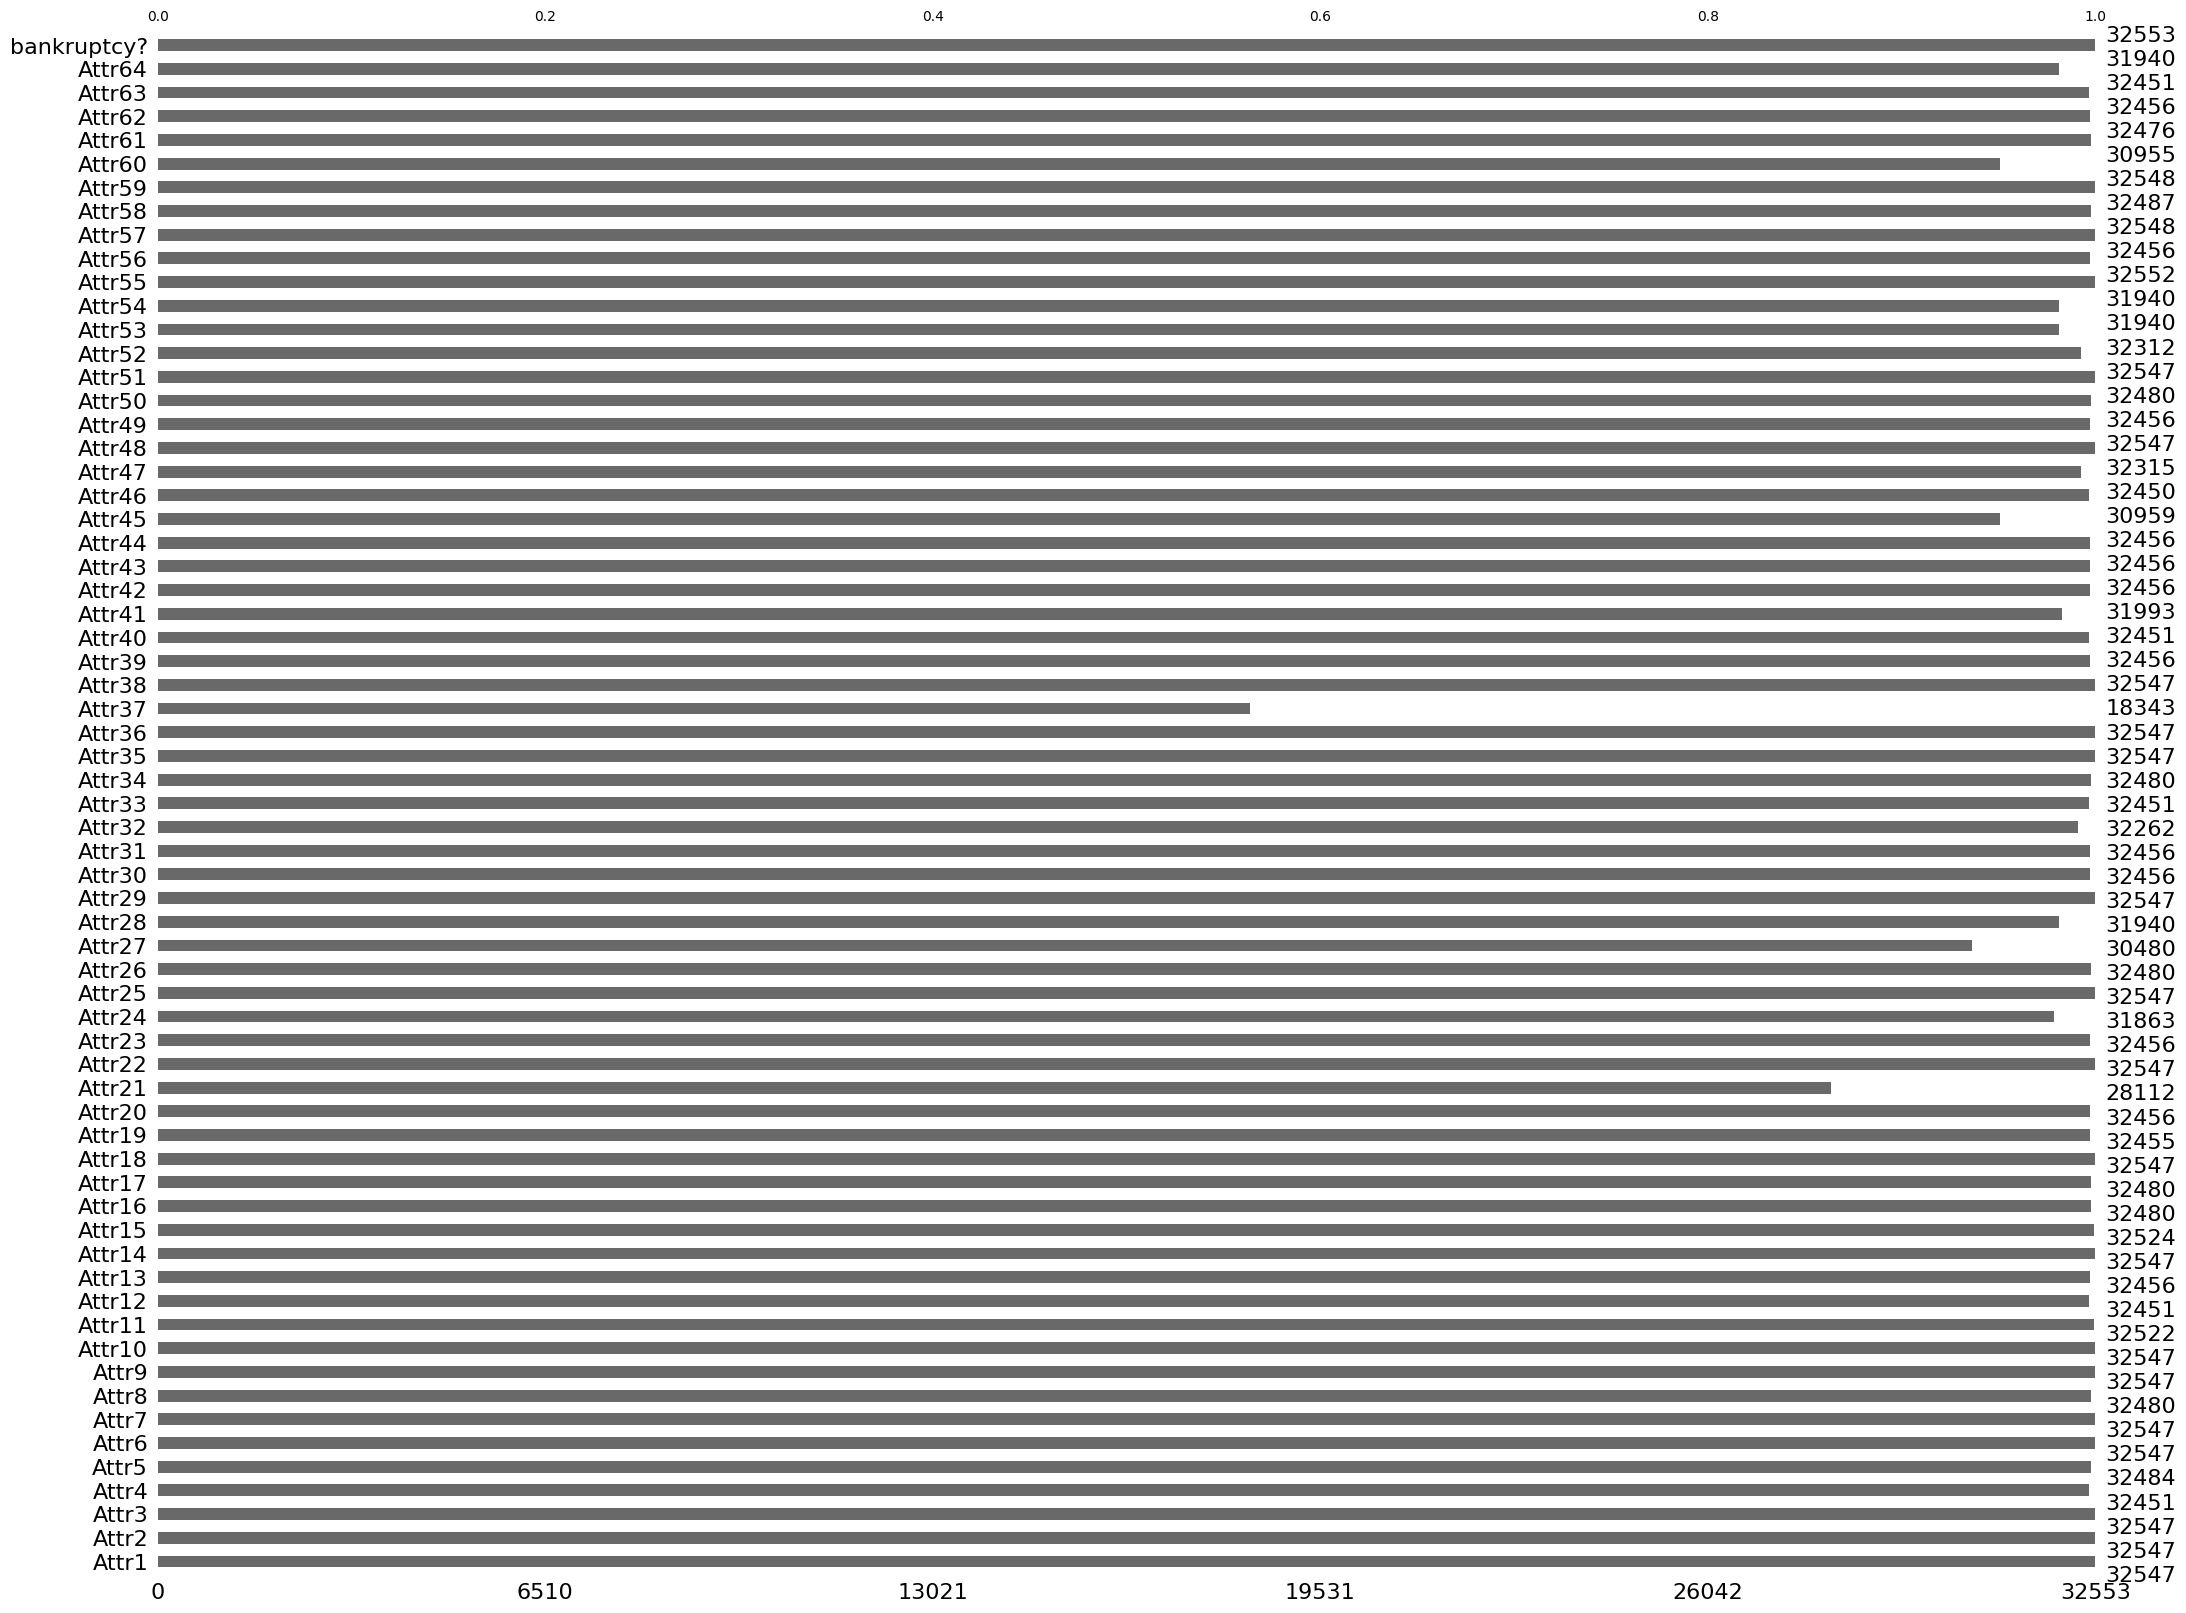

In [9]:
msno.bar(df)


In [10]:
#Replace missing values with mean 

df = df.fillna(df.mean())

### Imbalanced Data

# Balance the data set using SMOTE

In [11]:
from imblearn.over_sampling import SMOTE


###DateMappingMatch is 0 for more than 8k samples.


## Evaluation Metric
- As data is imbalanced, Accuracy, precision are bad metrics.
- Recall = true positives/(true positives + false negatives) 
-<b> Recall </b> is metric that we need to consider, the higher the recall the better the model is.. 

## Baseline Models

- Comparision of various spot check algorithms and Ensemble models as baseline.
- Xgboost model produces best result for baseline for imbalanced dataset, hence will be tuning the xgboost model only.


Using Cross validation to see the best  model 

In [18]:
# Test options and evaluation metric
num_folds = 10
seed = np.random.seed
scoring = 'recall'
validation_size = 0.15

In [24]:
y.value_counts()

0    30985
1    30985
Name: bankruptcy?, dtype: int64

In [25]:
#df['bankruptcy?']= (df.matched_transaction_id == df.feature_transaction_id).astype(int)

smote = SMOTE()
x, y = smote.fit_resample(df.drop('bankruptcy?', axis=1), df['bankruptcy?'])
#x=x.drop(['target', 'DifferentPredictedTime','DifferentPredictedDate'], axis=1) 
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.15, random_state=42,shuffle=True)



In [26]:
# Spot-Check Algorithms
models = []
models.append(( ' LR ' , LogisticRegression()))
models.append(( ' LDA ' , LinearDiscriminantAnalysis()))
models.append(( ' KNN ' , KNeighborsClassifier()))
models.append(( ' CART ' , DecisionTreeClassifier()))
models.append(( ' NB ' , GaussianNB()))
models.append(( ' SVM ' , SVC()))

 LR : 0.393522 (0.077032)
 LDA : 0.592525 (0.005279)
 KNN : 0.967231 (0.003287)
 CART : 0.946364 (0.005371)
 NB : 0.977824 (0.003357)
 SVM : 0.891341 (0.009783)


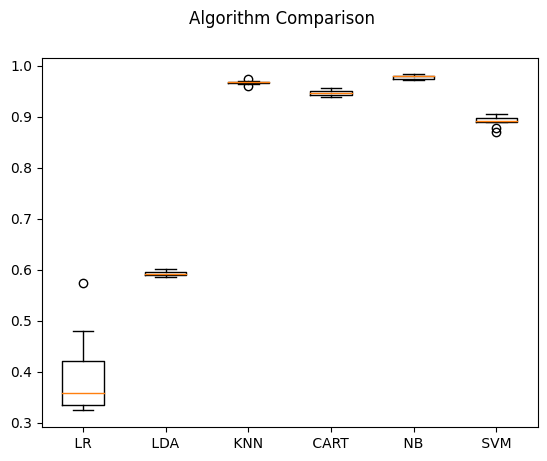

In [27]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='recall')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
#pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA',
#LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.650492 (0.009333)
ScaledKNN: 0.951852 (0.004480)
ScaledCART: 0.946657 (0.005575)
ScaledNB: 0.973085 (0.004604)
ScaledSVM: 0.665275 (0.017600)


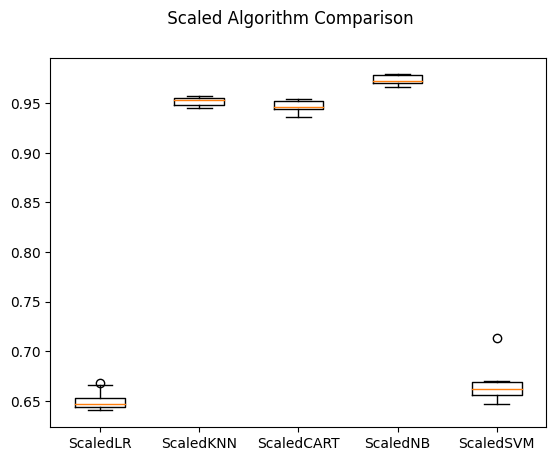

In [29]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle( ' Scaled Algorithm Comparison ' )
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
#plt.savefig("./images/output4.png")

plt.show()


In [30]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=num_folds)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

AB: 0.862436 (0.007249)
GBM: 0.913401 (0.007664)
RF: 0.989058 (0.001659)
ET: 0.985951 (0.002571)


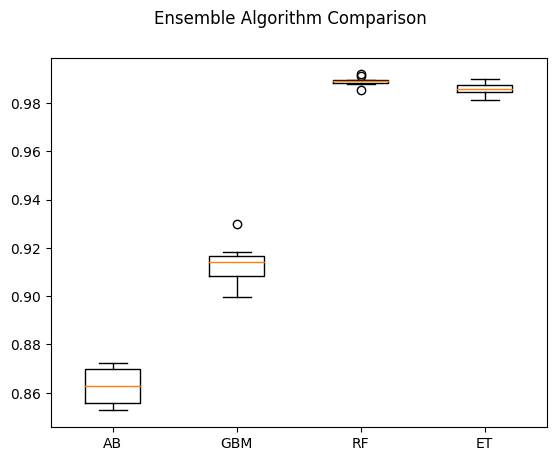

In [31]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.show()


In [32]:
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
out=[]
Names =[]

In [33]:
for Name, algos in ensembles:
	kfold = KFold(n_splits=num_folds)
	cv_results = cross_val_score(algos, X_train, Y_train, cv=kfold, scoring=scoring)
	out.append(cv_results)
	Names.append(Name)
	msg = "%s: %f (%f)" % (Name, cv_results.mean(), cv_results.std())
	print(msg)

ScaledAB: 0.862510 (0.007057)
ScaledGBM: 0.912867 (0.007077)
ScaledRF: 0.988783 (0.002247)
ScaledET: 0.986132 (0.001985)


# USE OF XGBOOST

Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 

# FEATURE IMPORTANCE USING XGBOOST

Feature: 0, Score: 0.00428
Feature: 1, Score: 0.00924
Feature: 2, Score: 0.00442
Feature: 3, Score: 0.01231
Feature: 4, Score: 0.01836
Feature: 5, Score: 0.07435
Feature: 6, Score: 0.00253
Feature: 7, Score: 0.00390
Feature: 8, Score: 0.00503
Feature: 9, Score: 0.01943
Feature: 10, Score: 0.00320
Feature: 11, Score: 0.00748
Feature: 12, Score: 0.00748
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00522
Feature: 15, Score: 0.01723
Feature: 16, Score: 0.00704
Feature: 17, Score: 0.00366
Feature: 18, Score: 0.01339
Feature: 19, Score: 0.01777
Feature: 20, Score: 0.05016
Feature: 21, Score: 0.01532
Feature: 22, Score: 0.00570
Feature: 23, Score: 0.00975
Feature: 24, Score: 0.04426
Feature: 25, Score: 0.07624
Feature: 26, Score: 0.06708
Feature: 27, Score: 0.00580
Feature: 28, Score: 0.00733
Feature: 29, Score: 0.00650
Feature: 30, Score: 0.00586
Feature: 31, Score: 0.01453
Feature: 32, Score: 0.01193
Feature: 33, Score: 0.07830
Feature: 34, Score: 0.00862
Feature: 35, Score: 0.00465
Fe

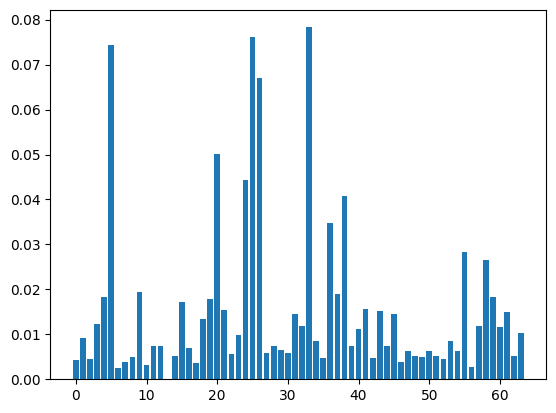

In [34]:
from xgboost import XGBClassifier

model = XGBClassifier()
# fit the model
model.fit(X_train, Y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
#plt.savefig("./images/output6.png")
plt.show()



In [35]:
train = xgboost.DMatrix(X_train, label=Y_train)
test = xgboost.DMatrix(X_test, label=Y_test)
watchlist = [(test, 'eval'), (train, 'train')]

xgb_params = {
            'objective': 'binary:logistic',
            'tree_method': 'hist',
            'max_depth': 2, 
            'eta':0.1,
            'subsample':0.5,
            'colsample_bytree': 0.05,
            
}

clf = xgboost.train( xgb_params,train, num_boost_round=10000, )

preds = clf.predict(test)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4649
           1       0.98      0.98      0.98      4647

    accuracy                           0.98      9296
   macro avg       0.98      0.98      0.98      9296
weighted avg       0.98      0.98      0.98      9296

 In the Confusion Matrix below, the digonal values represent correct classification for each class : 


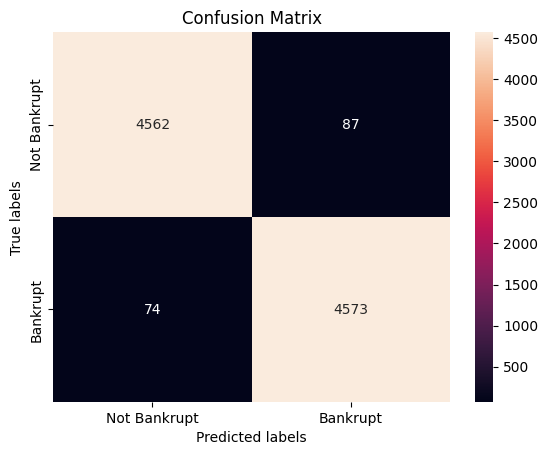

In [36]:
print(classification_report((Y_test),preds.round(0)))
print( " In the Confusion Matrix below, the digonal values represent correct classification for each class : ")
labels = ['Not Bankrupt', 'Bankrupt']

cm = sklearn.metrics.confusion_matrix((Y_test),(preds.round(0).astype(int)))
 

ax= plt.subplot()
sns.heatmap(cm.astype(int), annot=True,fmt='g', ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
#plt.savefig("./images/output7.png")
plt.show()


- The XBOOST has decent recall, precision when compared with others. 


### Improving XGBOOST

Best approach: Using hyperparameter tuning for XGBoost using gridsearch


In [38]:
from sklearn.model_selection import RandomizedSearchCV


In [45]:
gbm_param_grid = {
        'learning_rate' : np.arange(0.05,1.05,0.05),
        'n_estimators'  : np.arange(200,500),
        'min_child_weight': [1, 5],
        'gamma': [0.5, 1, 1.5],
        'subsample': [0.6, 0.8],
        'colsample_bytree': [0.6, 0.8],
        'max_depth': [3, 4]
        }

gbm_param_grid

{'learning_rate': array([0.05]),
 'n_estimators': array([200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212,
        213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225,
        226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238,
        239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251,
        252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264,
        265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277,
        278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290,
        291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303,
        304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316,
        317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329,
        330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342,
        343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355,
        356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368,
  

In [46]:
xgb2 = XGBClassifier(
 max_depth=5,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=35,
 seed=42)

In [47]:
random_search = RandomizedSearchCV(estimator=xgb2, param_distributions=gbm_param_grid, n_iter=25, scoring='recall',cv=4,verbose=1)


- scale_pos_weight is the ratio of number of negative class to the positive class.
- this improves the recall value significantly to 0.99.. 

In [48]:
import pickle
#file_name = "./model/xgb_model.pkl"
#pickle.dump(clf, open(file_name, "wb"))

In [49]:
random_search.fit(X_train,Y_train)


Fitting 4 folds for each of 25 candidates, totalling 100 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
       421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433,
       434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446,
       447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459,
       460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472,
       473, 474, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485,
       486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498,
       499]),
                                        'subsample': [0.6, 0.8]},
                   scoring='recall', verbose=1)

In [50]:
random_search.best_params_


{'subsample': 0.6,
 'n_estimators': 228,
 'min_child_weight': 5,
 'max_depth': 3,
 'learning_rate': 0.05,
 'gamma': 1,
 'colsample_bytree': 0.6}

In [51]:
bestxbg = random_search.best_estimator_.fit(X_train, Y_train) # fit the model with best parameters


In [52]:
y_pred_xgb_best = bestxbg.predict(X_test) # predict the labels
predictions = [round(value) for value in y_pred_xgb_best]


In [55]:
print(classification_report((Y_test),predictions))


              precision    recall  f1-score   support

           0       1.00      0.50      0.66      4649
           1       0.66      1.00      0.80      4647

    accuracy                           0.75      9296
   macro avg       0.83      0.75      0.73      9296
weighted avg       0.83      0.75      0.73      9296



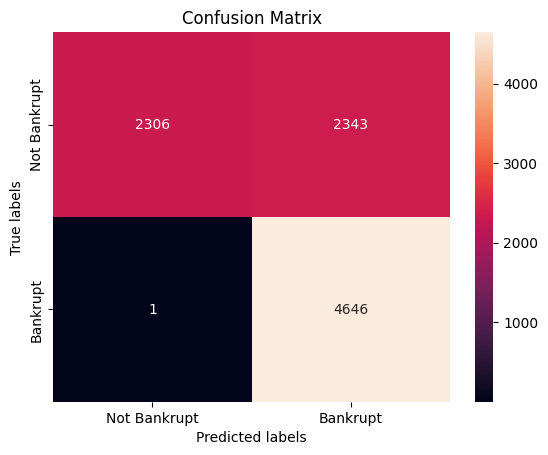

In [58]:
labels = ['Not Bankrupt', 'Bankrupt']

cm = sklearn.metrics.confusion_matrix((Y_test),(predictions))
 
ax= plt.subplot()
sns.heatmap(cm.astype(int), annot=True,fmt='g', ax = ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels);
#plt.savefig("./images/output7.png")
plt.show()


### Future steps:
- Use of deep learning based approaches for larger dataset.
- Hyper-Parameter optimization for Xgboost and others might not significantly improve the results as the dataset.

### Conclusion:

- Recall is chosen as the main evaluation metric to consider.
- Hyper-Parameter optimization for Xgboost and others might not significantly improve the results as the dataset is imbalanced.
- Dropping negative correlated features/ outliers didnt produce better results.
- Data transformation might be needed after understanding of each of the column features.
- Dimensionality reduction / DL based approaches can be explored. 
